<div>Carthage University<br>
INSAT<br>
Department of Mathematics & Computer Sciences</div>
<hr>
<div style="text-align:center"><h1>Practical works: Simple Regression</h1></div>
<hr>

**1. Import the two columns of the Excel table "Exemple2Reference_SReg".**

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Read the Excel file
df = pd.read_excel("Practice Sheets\Practice #2\Exemple2Reference_SReg.xlsx", usecols=["X", "Y"])
# Print the data
df


,X,Y
0,4,14.561964
1,5,16.305237
2,3,13.032312
3,0,0.762464
4,1,3.771966
5,3,12.652433
6,2,4.351902
7,1,3.517255
8,5,13.400970
9,4,11.451762


**2. Plot the scattergram of X and Y, use the command plot(), comment the obtained graph.**

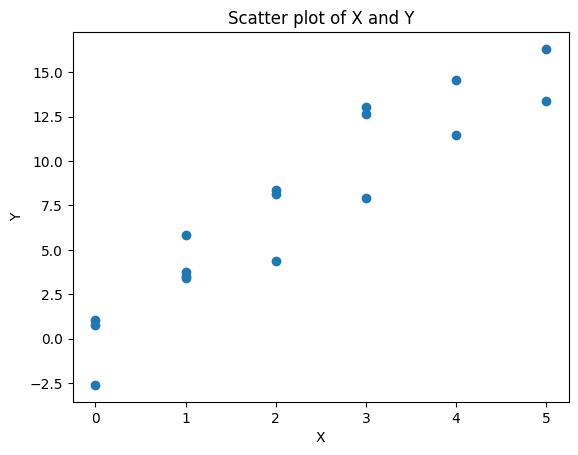

In [3]:
import matplotlib.pyplot as plt # data visualization library

# Create a scatter plot of X and Y
plt.scatter(df["X"], df["Y"])

# Add axis labels and title to the plot
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X and Y")

# Display the plot
plt.show()

**3. Apply the command lm(Y  X), explain the parameters you get.**

To perform a simple linear regression analysis in R, use the `lm(Y X)` command, where Y is the response variable and X is the predictor variable. This command estimates the relationship between Y and X by fitting a line to the data points.

        To perform a simple linear regression analysis in Python, use the `statsmodels.api` library. 

In [4]:
! pip install statsmodels

In [10]:
import statsmodels.api as sm

# Fit a linear regression model
X = sm.add_constant(df["X"])
model = sm.OLS(df["Y"], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           2.87e-08
Time:                        12:15:23   Log-Likelihood:                -34.664
No. Observations:                  17   AIC:                             73.33
Df Residuals:                      15   BIC:                             74.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6697      0.805      0.832      0.4

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


*The model summary provides a lot of information, including the coefficients, standard errors, t-values, and p-values for each variable in the model. The R-squared value indicates the proportion of variance in the dependent variable that is explained by the independent variable. The F-statistic and Prob (F-statistic) values provide information on the overall significance of the model.*

**R-squared**: The proportion of the variation in the response variable explained by the predictor variable is measured by this parameter. It has a value between 0 and 1, with higher numbers indicating a stronger relationship between X and Y.

**Coefficients**: These values represent the linear regression model's estimated slope and intercept. The slope coefficient (X) calculates the change in the response variable (Y) that corresponds to a one-unit increase in the predictor variable (X). When the predictor variable is equal to zero, the intercept coefficient represents the estimated value of the response variable.

**Standard errors**: The standard deviation of the estimated coefficients is represented by these parameters. Larger standard errors indicate that the estimated coefficients are more uncertain.

**t-values**: These parameters represent the estimated coefficient to standard error ratio. They are used to test the hypothesis that the coefficient's true value is zero (i.e., no relationship between X and Y). Greater absolute t-values imply more evidence against the null hypothesis.

**P-values**: These factors describe the likelihood of seeing a t-value that is as extreme or more extreme than the observed value, assuming the null hypothesis is true. Lower p-values suggest more evidence against the null hypothesis. A p-value of less than 0.05 is commonly used as a criterion for significance.

**In summary, the lm function in R is equivalent to the OLS function in Python, which creates a linear regression model. The model summary provides information on the model parameters and goodness of fit, which can be used to evaluate the relationship between the dependent and independent variables.**

**We can establish the strength and importance of the link between X and Y by studying these factors, and we can make predictions about the value of Y given a value of X.**
<hr>

**4. Use the command abline(regXY$coefficients) and plot the regression line, comment.**

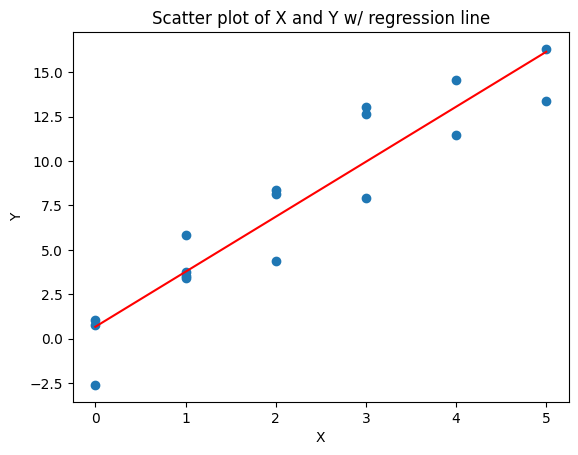

In [11]:
import numpy as np

# Plot the scatter plot of X and Y
plt.scatter(df["X"], df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X and Y w/ regression line")

# Add the regression line to the plot
x_values = np.array([df["X"].min(), df["X"].max()])
y_values = model.params[0] + model.params[1] * x_values
plt.plot(x_values, y_values, color="red")

# Display the plot
plt.show()

**5. Apply the command anova(regXY) and explain all outputs and how you can get them
manually**

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a linear regression model
model = ols('Y ~ X', data=df).fit()

# Calculate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

              sum_sq    df           F        PR(>F)
X         425.959048   1.0  108.734732  2.872479e-08
Residual   58.761222  15.0         NaN           NaN


**Now, Manually**

In [7]:
# Calculate the sums of squares
SSR = sum((model.fittedvalues - df["Y"].mean())**2)
SSE = sum(model.resid**2)
SST = SSR + SSE

# Calculate the degrees of freedom
df_R = 1
df_E = df.shape[0] - 2

# Calculate the mean sum of squares and F-statistic
MSR = SSR / df_R
F_statistic = MSR / (SSE / df_E)

# Create a dictionary to store the values
values = {
    "degrees of freedom": [df_R, df_E, df.shape[0] - 1],
    "sum of squares": [SSR, SSE, SST],
    "mean sum of squares": [MSR, SSE / df_E, None],
    "F-statistic": [F_statistic, None, None],
    "p-value": [model.f_pvalue, None, None]
}

# Create a dfFrame
data = pd.DataFrame(values, index=["Regression", "Residual", "Total"])

# Display the dfFrame
data


,degrees of freedom,sum of squares,mean sum of squares,F-statistic,p-value
Regression,1,425.959048,425.959048,108.734732,2.872479e-08
Residual,15,58.761222,3.917415,NaN,NaN
Total,16,484.720270,NaN,NaN,NaN


**6. By using the command confint() give a confidence interval of the regression coefficients
with a level of confidence of 5%.**

In [16]:
# Calculate the confidence intervals for the coefficients
conf_int = model.conf_int(alpha=0.05)

print("95% confidence intervals for the coefficients:")
conf_int

95% confidence intervals for the coefficients:


,0,1
Intercept,-1.045745,2.385083
X,2.462293,3.727520


**7. Explain how you can obtain the same confidence interval by hand but using "R" !(You mean Python, right? 😏)**

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
# Extract coefficient estimates and standard errors
coef_est = model.params
std_err = model.bse
# Calculate t-values
t_values = t.ppf(0.975, df=len(df)-2)
# Finally, we can calculate the confidence intervals using
# the formula Estimate ± t-value * Standard error:
# Calculate confidence intervals
conf_int_manual = pd.DataFrame({'lower': coef_est - t_values * std_err, 
                                'upper': coef_est + t_values * std_err})
conf_int_manual

,lower,upper
Intercept,-1.045745,2.385083
X,2.462293,3.727520


**8. Use the command predict() to predict the value of Y for X = 500.**

In [15]:
# Predict value of Y for X = 500
X_new = pd.DataFrame({'X': [500]}) # create a new DataFrame with X = 500
X_new = sm.add_constant(X_new) # add intercept term to X
y_pred = model.predict(X_new) # predict value of Y for X = 500

print("Predicted value of Y for X = 500: ", y_pred[0])


Predicted value of Y for X = 500:  1548.122754042467
